In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disney-characters-dataset/cartoon/test/pumba/51DOufyngYL.jpg
/kaggle/input/disney-characters-dataset/cartoon/test/pumba/922-9221627_timon-and-pumbaa-cartoon-character-timon-and-pumbaa.png
/kaggle/input/disney-characters-dataset/cartoon/test/pumba/37-372140_the-lion-king-clipart-grub-timon-and-pumbaa.png
/kaggle/input/disney-characters-dataset/cartoon/test/pumba/329-3293123_yogi-bear-clipart-pumbaa-not-in-front-of.png
/kaggle/input/disney-characters-dataset/cartoon/test/pumba/143-1431696_the-lion-king-clipart-grub-timon-and-pumbaa.png
/kaggle/input/disney-characters-dataset/cartoon/test/pumba/225-2250638_timon-and-pumbaa-dancing-cartoon-timon-and-pumbaa.png
/kaggle/input/disney-characters-dataset/cartoon/test/pumba/341-3413268_lion-king-pumbaa-clipart-hd-png-download.png
/kaggle/input/disney-characters-dataset/cartoon/test/pumba/807-8073301_timon-and-pumbaa-cartoon-character-timon-and-pumbaa.png
/kaggle/input/disney-characters-dataset/cartoon/test/pumba/41-411600_timon-y-p

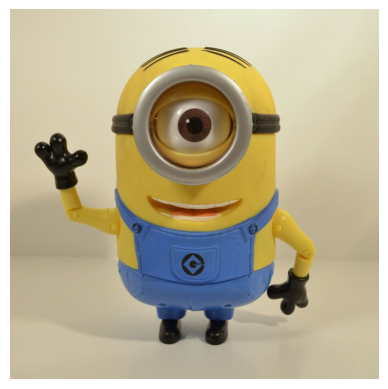

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (change this to the path of your Minion image on Kaggle)
image = cv2.imread('/kaggle/input/disney-characters-dataset/cartoon/train/minion/-3792160087753832493.jpg')

# Convert image to RGB (OpenCV loads images in BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


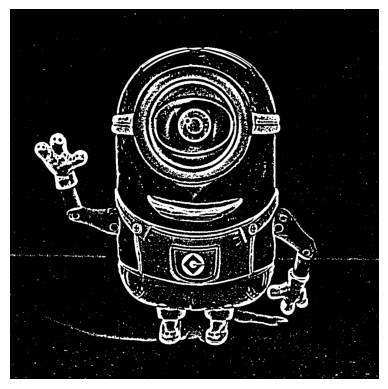

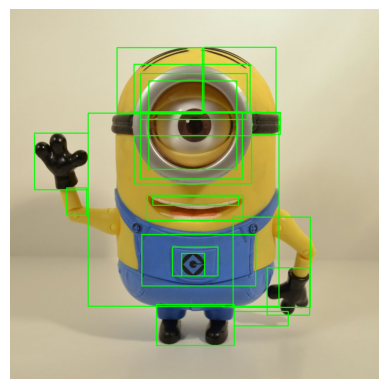

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_with_boxes = image.copy()
for contour in contours:
    if cv2.contourArea(contour) > 500:  
        x, y, w, h = cv2.boundingRect(contour)
       
        cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

image_with_boxes_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)
plt.imshow(image_with_boxes_rgb)
plt.axis('off')
plt.show()


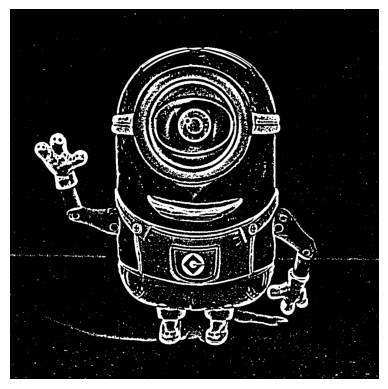

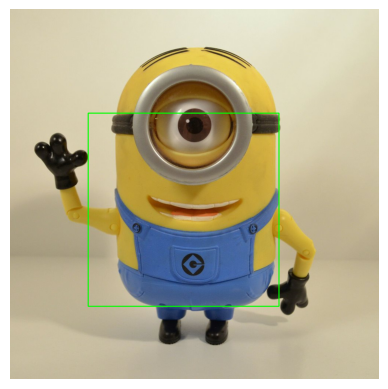

In [8]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_with_boxes = image.copy()

max_area = 0
max_perimeter = 0
max_contour = None

for contour in contours:
    if cv2.contourArea(contour) > 500:  
        
        perimeter = cv2.arcLength(contour, True)
        

        hull = cv2.convexHull(contour)
        
        if cv2.contourArea(hull) > max_area:
            max_area = cv2.contourArea(hull)
            max_perimeter = perimeter
            max_contour = hull

if max_contour is not None:
    x, y, w, h = cv2.boundingRect(max_contour)
    
    cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

image_with_boxes_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

plt.imshow(image_with_boxes_rgb)
plt.axis('off')
plt.show()


It ended up choosing the largest box. But all the contour features collectively make up the minion.
- To tackle this , I created this algorithm to the minimum x and max x value , min y(height of minion) and max y cordinate of all contours produced. Use this to draw the largest box.
- This helped me create automated labels for yolo preprocessing. Yolo models need a label that has the cordinates.(RoboFlow's automatic labelling) This is because the minion dataset isn't a part of COCO dataset that yolo was trained on. So it needs to learn to identify minions.
- I will run through all the images in the folder and store their labels in a label folder with extension txt. 
- Limitations : If the background isnt monotonous the contouring will happen in other regions affecting the minion box. 

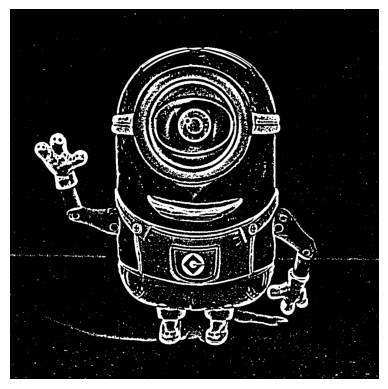

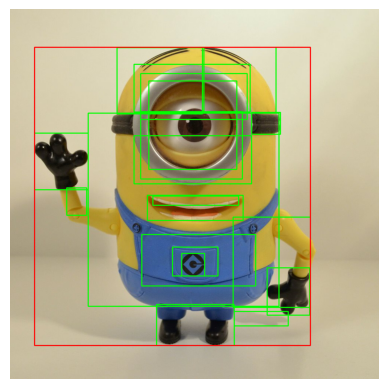

In [9]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_with_boxes = image.copy()
min_x, min_y, max_x, max_y = float('inf'), float('inf'), float('-inf'), float('-inf')

for contour in contours:
    if cv2.contourArea(contour) > 500:  
        
        x, y, w, h = cv2.boundingRect(contour)
        
        
        min_x = min(min_x, x)
        min_y = min(min_y, y)
        max_x = max(max_x, x + w)
        max_y = max(max_y, y + h)

        
        cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.rectangle(image_with_boxes, (min_x, min_y), (max_x, max_y), (0, 0, 255), 2)  

image_with_boxes_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

plt.imshow(image_with_boxes_rgb)
plt.axis('off')
plt.show()